In [1]:
import numpy as np
import nysg_tools as ny 
import pandas as pd
from math import log10
import pyvisa as visa
import matplotlib.pyplot as plt

In [2]:
rm = visa.ResourceManager()
rm.list_resources()

('USB0::0x0699::0x03C4::C010501::INSTR',
 'USB0::0x0699::0x0346::C034167::INSTR',
 'ASRL1::INSTR',
 'ASRL10::INSTR')

In [3]:
osci_name = "USB0::0x0699::0x03C4::C010501::INSTR"
fungen_name = "USB0::0x0699::0x0346::C034167::INSTR"
osci = rm.open_resource(osci_name)
fungen = rm.open_resource(fungen_name)

In [4]:
def get_osci(additional_info = False, plot=False):
    osci.write("DAT:SOU CH1")
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    osci.write("DAT:SOU CH2")

    yze2, ymu2, yoff2 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')

    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    osci.write("DAT:SOU CH2")
    data2 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    tiempo = xze + np.arange(len(data1)) * xin

    data1v = (data1 - yoff1) * ymu1 + yze1
    data2v = (data2 - yoff2) * ymu2 + yze2
    
    if plot:
        plt.plot(tiempo,data1v)
        plt.plot(tiempo,data2v)

    if additional_info:
        extra = {"yze1":yze1,"ymu1":ymu1,"yoff1":yoff1,"yze2":yze2,"ymu2":ymu2,"yoff2":yoff2,"datach1raw":data1,"datach2raw":data2}
        return tiempo,data1v,data2v, extra

    return tiempo,data1v,data2v

def osci_autosave(filename,attrs,plot_saved=False):
    t,v1,v2 = get_osci()
    buffer =  pd.DataFrame({"time":t,"VCH1":v1,"VCH2":v2})

    buffer.attrs = attrs
    
    buffer.to_csv(f'{filename}{".csv"}')
    buffer.to_pickle(f'{filename}')

    if plot_saved:
        plt.plot(t,v1)
        plt.plot(t,v2)


def osci_autosave_simple(filename):
    t,v1,v2 = get_osci()
    buffer =  pd.DataFrame({"time":t,"VCH1":v1,"VCH2":v2})

    buffer.to_pickle(f'{filename}')

In [5]:
fungen.write("SOURCE1:FREQ 1k")

17

# Análisis de estabilidad 

In [ ]:
# La primera data es una toma del circuito simple, con solamente un circuito y medio igual que el que esta en el campus 

# Medimos out2. 

#valores de diodos utilizados: 1n4007
# capacitores 1: 1u, 2u, 1u 
# data 1
# hecha a 1khz
# 10v 

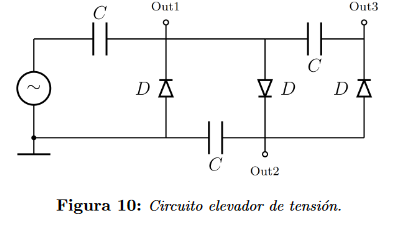

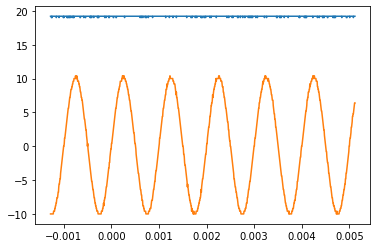

In [26]:
#osci_autosave('data1',attrs={},plot_saved=True)

data 2:

In [ ]:
# Segunda data:
# la unica diferencia es que se agrega una resistencia en paralelo al final del circuito y se mide eso  en 10k 

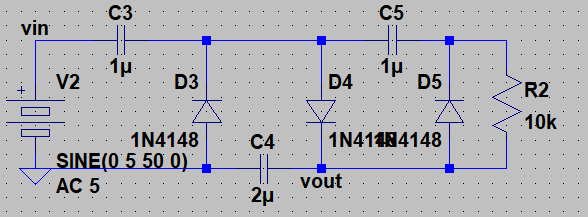

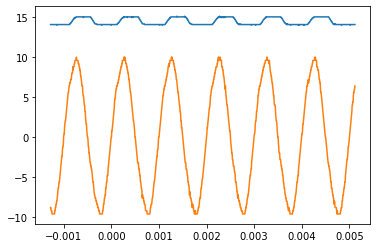

In [27]:
# osci_autosave('data2',attrs={},plot_saved=True)

data 3:

In [28]:
# Tercera data:
#Igual que el de arriba pero de 100k(95),

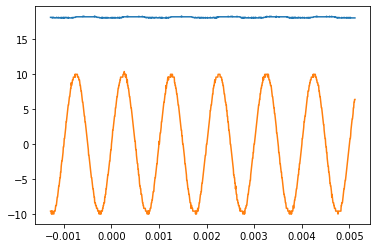

In [35]:
# osci_autosave('data3',attrs={},plot_saved=True)

**Toda la data dentro de misc pertenece a mediciones random, no a barridos en especifcio** 

Data 4:

In [31]:
# Data4: 
# ahora pusimos 50 Ohm 

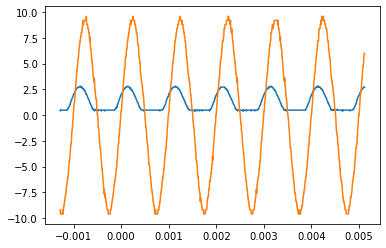

In [33]:
# osci_autosave('misc/data4',attrs={},plot_saved=True)

# Circuito extendido

Estas mediciones corresponden al circuito extendido para funcionar como un cuadruple amplificador 

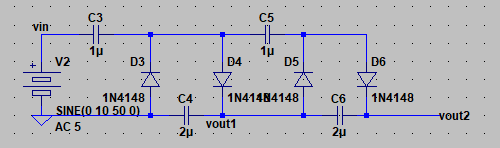

Con estos mismos valores, pero con un 10vpp y 1khz y la medición sobre vout2 

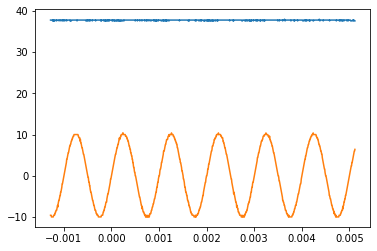

In [51]:
# Data 1 del cuadruple pertence a la medicion de vout2 normal sin resistencia 
# osci_autosave('cuadruple/data1',attrs={},plot_saved=True)

## Graficosilvia

**la carpeta silvia pertencee a los graficos de silvia**

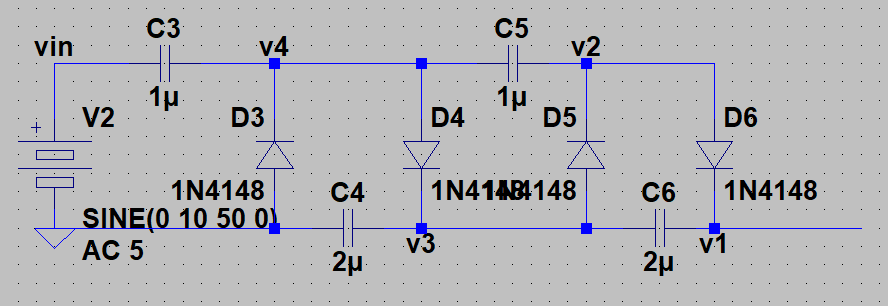

Cada medición pertenece a un punto en el graficosilvia 
en orden 

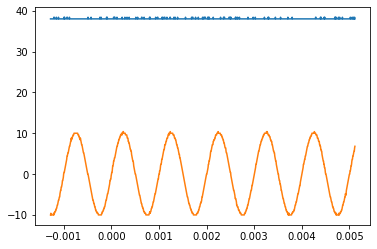

In [61]:
# osci_autosave('cuadruple/silvia/v1',attrs={},plot_saved=True)

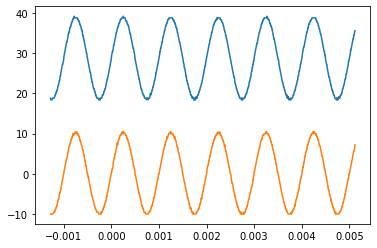

In [62]:
# osci_autosave('cuadruple/silvia/v2',attrs={},plot_saved=True)

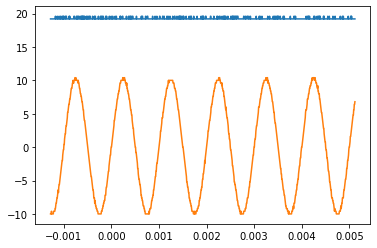

In [63]:
# osci_autosave('cuadruple/silvia/v3',attrs={},plot_saved=True)

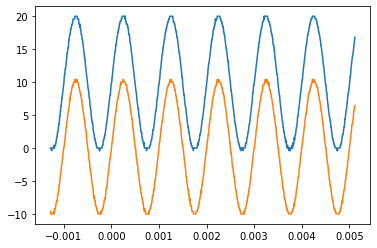

In [64]:
# osci_autosave('cuadruple/silvia/v4',attrs={},plot_saved=True)

# Barrido (s)

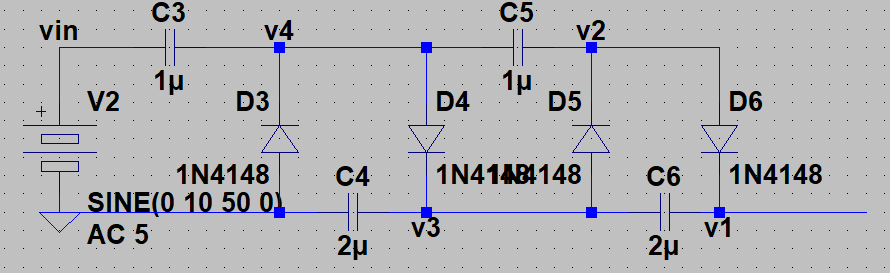

Utilizando este circuito vamos a hacer un barrido de frecuencias y analizar la estabilidad bajo barrido1/

In [101]:
import time 
# voy a probar un rangoarbitrario desde 10Hz a 1MHz 
freq = np.logspace(2,6,100)
overf = 1/np.array(freq)


# for (i,freq) in enumerate(freq):
    
#     fungen.write(f'SOURCE1:FREQ {freq}')
    
#     t, v1, v2 = get_osci()
    
#     osci.write(f"HOR:MAI:SCALE {3/10 * 0.8 *overf[i]}")
#     osci_autosave_simple(f'barrido1/data{i}')
#     time.sleep(0.1)
    
    

100.0
109.74987654930557
120.45035402587824
132.19411484660287
145.082877849594
159.22827933410923
174.7528400007683
191.79102616724887
210.49041445120199
231.01297000831605
253.53644939701115
278.2559402207126
305.3855508833416
335.1602650938841
367.8379771828634
403.70172585965537
443.0621457583882
486.26015800653533
533.6699231206312
585.7020818056667
642.807311728432
705.4802310718645
774.263682681127
849.7534359086446
932.60334688322
1023.5310218990269
1123.3240329780276
1232.8467394420659
1353.0477745798075
1484.9682622544651
1629.7508346206434
1788.649529057435
1963.0406500402723
2154.4346900318847
2364.4894126454074
2595.0242113997374
2848.035868435802
3125.7158496882353
3430.4692863149194
3764.9358067924713
4132.012400115339
4534.878508128582
4977.023564332114
5462.277217684343
5994.8425031894085
6579.332246575683
7220.809018385471
7924.828983539178
8697.490026177835
9545.484566618346
10476.157527896663
11497.569953977356
12618.56883066021
13848.863713938747
15199.11082952933


In [103]:
freqs = np.logspace(2,6,100)
vs = np.array([])

for (i,freqss) in enumerate(freqs):
    data = pd.read_pickle(f'barrido1/data{i}')
    vs=np.append(vs,np.max(data['VCH1']))

In [120]:
np.diff(vs)

array([ 0.8,  0. ,  0.4,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ,  0. ,
        0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. , -0.4,  0. ,  0.4, -0.4,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.4,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. , -0.4,  0.4, -0.4,  0. ,  0. ,  0. ,
        0. , -0.4,  0. ,  0. ,  0. , -0.4,  0. ,  0. ,  0. , -0.4,  0. ,
        0. , -0.4,  0. ,  0. , -0.4,  0. , -0.4,  0. , -0.4,  0. , -0.4])

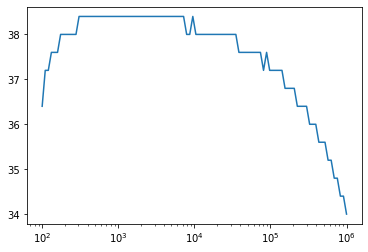

In [121]:
plt.plot(freqs,vs)
plt.xscale('log')

### Barrido de tensiones 

El barrido 2 en 1KHz va a ser sobre tensiones. 

In [122]:
volts = np.linspace(0,10,100)

# for (i,volt) in enumerate(volts):
    
#     fungen.write(f'SOURCE1:VOLT {volt}')
    
#     t, v1, v2 = get_osci()

#     osci_autosave_simple(f'barrido2/data{i}')
    
#     time.sleep(0.5)

# Circuito Misterioso

voy a hacer 3 barridos 

In [131]:
# # Barrid
# # o 1 es con una senoida
# # voy a probar un rangoarbitrario desde 10Hz a 1MHz 
# freq = np.logspace(1,6,100)
# overf = 1/np.array(freq)


# for (i,freq) in enumerate(freq):
    
#     fungen.write(f'SOURCE1:FREQ {freq}')
    
#     t, v1, v2 = get_osci()
    
#     osci.write(f"HOR:MAI:SCALE {3/10 * 0.8 *overf[i]}")
#     osci_autosave_simple(f'misterioso/barrido2/data{i}')

#     time.sleep(0.1)
    

In [132]:
# Barrid
# o 1 es con una cuadrada
# voy a probar un rangoarbitrario desde 10Hz a 1MHz 
# freq = np.logspace(1,6,100)
# overf = 1/np.array(freq)


# for (i,freq) in enumerate(freq):
    
#     fungen.write(f'SOURCE1:FREQ {freq}')
    
#     t, v1, v2 = get_osci()
    
#     osci.write(f"HOR:MAI:SCALE {3/10 * 0.8 *overf[i]}")
#     osci_autosave_simple(f'misterioso/barrido1/data{i}')

#     time.sleep(0.1)
    

In [133]:
# Barrid
# o 3 es con una triangular
# voy a probar un rangoarbitrario desde 10Hz a 1MHz 
# freq = np.logspace(1,6,100)
# overf = 1/np.array(freq)


# for (i,freq) in enumerate(freq):
    
#     fungen.write(f'SOURCE1:FREQ {freq}')
    
#     t, v1, v2 = get_osci()
    
#     osci.write(f"HOR:MAI:SCALE {3/10 * 0.8 *overf[i]}")
#     osci_autosave_simple(f'misterioso/barrido3/data{i}')

#     time.sleep(0.1)

In [151]:
freq = np.logspace(1,6,100)
v_sinewave = np.array([])
v_square = np.array([])

for (i,freq) in enumerate(freq):
    data_sine = pd.read_pickle(f'misterioso/barrido2/data{i}')
    data_square = pd.read_pickle(f'misterioso/barrido1/data{i}')
    v_sinewave = np.append(v_sinewave,np.max(data_sine['VCH1']))
    v_square = np.append(v_square,np.max(data_square['VCH1']))

Text(0, 0.5, 'Voltage [V]')

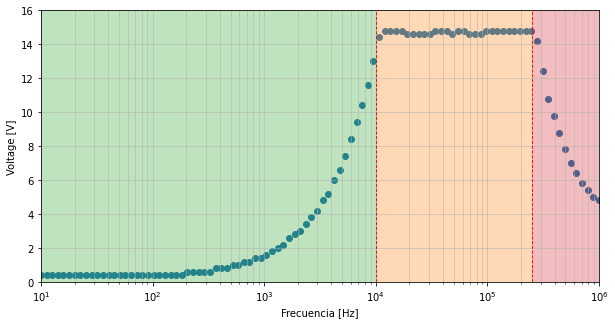

In [179]:
freq = np.logspace(1,6,100)
plt.figure(figsize=(10,5))

plt.scatter(freq,v_sinewave)
# plt.plot(freq,v_square)
plt.fill_between(np.linspace(10**4,250e3),-10,20,alpha=.3)
plt.fill_between(np.linspace(0,10**4),-10,20,alpha=.3)
plt.fill_between(np.linspace(250e3,10**6),-10,20,alpha=.3)
plt.ylim(0,16)
plt.xlim(10,10**6)
plt.xscale('log')
plt.grid(which='both',linewidth=.5)
plt.axvline(10e3,c='r',linestyle='--',linewidth=.9)
plt.axvline(250e3,c='r',linestyle='--',linewidth=.9)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Voltage [V]")

In [155]:
freq[v_sinewave>14]

array([ 10722.6722201 ,  12045.03540259,  13530.4777458 ,  15199.11082953,
        17073.52647471,  19179.10261672,  21544.34690032,  24201.28264794,
        27185.88242733,  30538.55508833,  34304.69286315,  38535.28593711,
        43287.61281083,  48626.01580065,  54622.77217684,  61359.07273413,
        68926.1210435 ,  77426.36826811,  86974.90026178,  97700.99572992,
       109749.87654931, 123284.67394421, 138488.63713939, 155567.61439305,
       174752.84000077, 196304.06500403, 220513.0739903 , 247707.63559917,
       278255.94022071])